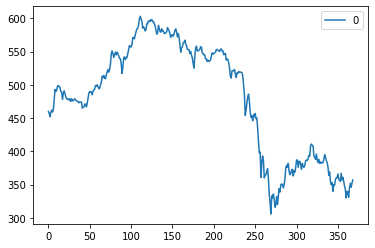

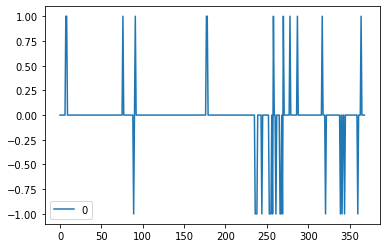

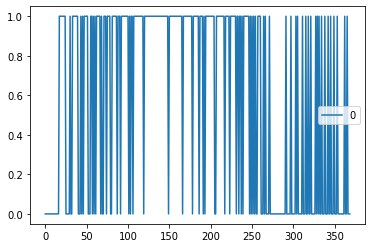

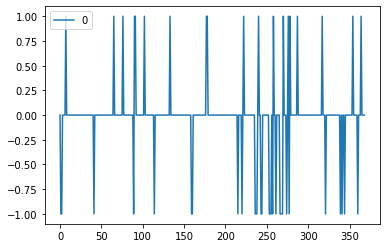

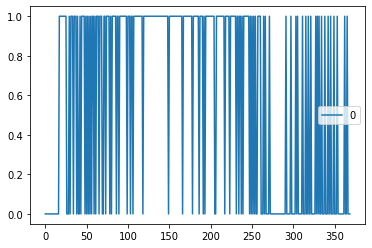

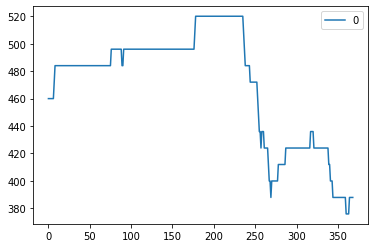

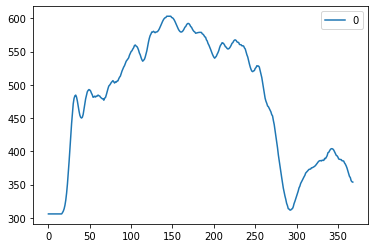

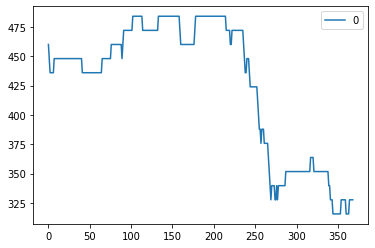

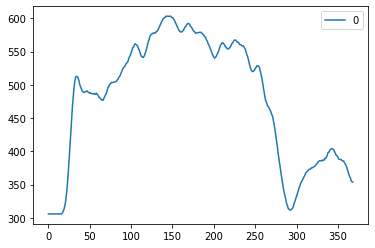

In [2]:
import sys
sys.path.append('..')

## Batch Encoding and Decoding
from SpiCoder.Batch import TBR as TBRb
from SpiCoder.Batch import BSA as BSAb

## Sequential Encoding and Decoding
from SpiCoder.Sequential import TBR as TBRs
from SpiCoder.Sequential import BSA as BSAs
import pandas as pd
import numpy as np
from scipy import signal as sg


## Load data
data_base = '../data/raw/dataIBM'
data_exts = '.csv'
targ_df = pd.read_csv(data_base+data_exts, header=None).astype('float64')

targ_df.plot()


## Initialize
# TBR
# f_factor: double[0:]
tbr_f_factor = 1.7
tbrb = TBRb(tbr_f_factor)
tbrs = TBRs(tbr_f_factor)
# BSA
# threshold: double[0:], window: int[1:], :fc: double[0:0.5]
bsa_threshold = 0.85
bsa_window = 24
bsa_fc = 1.5e-06
fir = sg.firwin(bsa_window, bsa_fc, fs=1)
bsab = BSAb(bsa_threshold, fir)
bsas = BSAs(bsa_threshold, fir)

# initialization is necessary at sequential
bsas.shift = float(np.min(targ_df))
bsas.gain = float(np.max(targ_df) - np.min(targ_df))


## Encode
# batch encode
tbrbe_df = pd.DataFrame(tbrb.encode(targ_df.values.squeeze()))
bsabe_df = pd.DataFrame(bsab.encode(targ_df.values.squeeze()))

# encode result
tbrbe_df.plot()
bsabe_df.plot()

# sequential encode
tbrse_df = pd.DataFrame(targ_df[0].apply(tbrs.encode))
bsase_df = pd.DataFrame(targ_df[0].apply(bsas.encode))

# encode result
tbrse_df.plot()
bsase_df.plot()


## Decode
# batch decode
tbrbd_df = pd.DataFrame(tbrb.decode(tbrbe_df.values.squeeze()))
bsabd_df = pd.DataFrame(bsab.decode(bsabe_df.values.squeeze()))

# decode result
tbrbd_df.plot()
bsabd_df.plot()

# sequential decode
tbrsd_df = pd.DataFrame(tbrse_df[0].apply(tbrs.decode))
bsasd_df = pd.DataFrame(bsase_df[0].apply(bsas.decode))

# decode result
tbrsd_df.plot()
bsasd_df.plot()